## Flow Balance and B-D Processes

## Proof

An Birth-Death Process is a special case of continuous-time Markov process where the state transitions are of only 2 types "births" (increasing the state var by 1), and "deaths" (decreasing state by one).

Our Markov Chain nxn transition matrix $P$ looks like this:
$$\begin{bmatrix}
q & p & 0 & 0 & \dots & 0 \\
q & 0 & p & 0 & \dots & 0 \\
0 & q & 0 & p & \dots & 0 \\
0 & 0 & q & 0 & \ddots & 0 \\
\vdots & \vdots & \vdots & \ddots & \ddots & p \\
0 & 0 & 0 & 0 & q & p
\end{bmatrix}$$
In this case we would have a discrete-time, finite-state BDP; or also a Nearest-Neighbor Random Walk (we will also see what happens when the walk is biased ($p\neq q$).

First we would like to prove that the stationary distribution $\pi$ must satisfy the Detailed Balance property ($\pi_{j}P_{ij}= \pi_{j}P_{ji}$).

Suppose $\pi$ stationary distribution of $P$ transition matrix, because $\pi$ is stationary we have that is invariant over P so:
$$\sum_{j=1}^{N}\pi_{j}P_{ji}=\pi_{i}$$

Since our $P$ matrix is tridiagonal and $P_{ii}=0$ for all $i\neq 1,n$ we would have for internal states:
$$\pi_{i}=\pi_{i-1}P_{i-1,i}+\pi_{i+1,i}P_{i+1,i}$$

Using that $P_{i-1,i}=p$ and $P_{i+1,i}=q$:
$$\pi_{i}=\pi_{i-1}p+\pi_{i+1,i}q$$

We have that the row sum for all internal states is 1 so $P_{i,i-1}+P_{i,i+1}=1$:
$$\pi_{i}(P_{i,i-1}+P_{i,i+1})=\pi_{i-1}p+\pi_{i+1,i}q$$

We rearrange the terms to see the probability flow between adjacent boundaries:
$$\pi_{i}P_{i,i-1}-\pi_{i-1}P_{i-1,i}=\pi_{i+1,i}P_{i+1,i}-\pi_{i}P_{i,i+1}$$
So in the left side of the equation we have the flow left out of i into i-1, and in the right side the flow left out of i+1 into i.

So we have that the net probability flux between any pair of states (i-1,i) is constant across all the internal stats:
$$\pi_{i}q-\pi_{i-1}p=C (\text{for } 2 \leq i \leq N-1)$$

For ($i=1$) we have:
$$\pi_1 = \pi_1 P_{1, 1} + \pi_2 P_{2, 1}$$

Substituting $P_{1,1}=q$ and $P_{2,1}=q$:
$$\pi_1 = \pi_1 q + \pi_2 q$$
$$\pi_2 q = \pi_1 (1 - q)$$

Since $p+q=1$, $1-q=p$:
$$\pi_2 q = \pi_1 p$$

So we have Detailed balance between state 1 and 2.

For ($i=N$) we will have:
$$\pi_N = \pi_{N-1} P_{N-1, N} + \pi_N P_{N, N}$$

Substituting $P_{N-1, N}=p$ and $P_{N, N}=p$:
$$\pi_N = \pi_{N-1} p + \pi_N p$$
$$\pi_{N-1} p = \pi_N (1 - p)$$

Since $1-p=q$:
$$\pi_{N-1} p = \pi_N q$$

So we have Detailed balance between state N-1 and N.

Because the flux C is constant through the chain it must be 0 everywhere so:
$$\pi_{i}q-\pi_{i-1}p=C \Longrightarrow \pi_{i}q=\pi_{i-1}p$$

So our chain has Detailed balance and is reversible.

(Actually we would also have this because the BDP was irreducible xdn't)

## Calculate stationary distribution

Given that our chain has Detail Balance and is reversible we simply have:

$$\pi_{i}=\left(\frac{p}{q}\right)\pi_{i-1}$$

We can see the structure of the components of $\pi$ recursively with the bias ratio $r=\frac{p}{q}$:
| State $i$ | Relation to $\pi_{i-1}$ | Relation to $\pi_1$ |
| :---: | :---: | :--- |
| 2 | $\pi_2 = r \cdot \pi_1$ | $\pi_2 = r^1 \pi_1$ |
| 3 | $\pi_3 = r \cdot \pi_2$ | $\pi_3 = r^2 \pi_1$ |
| $i$ | $\pi_i = r \cdot \pi_{i-1}$ | $\pi_i = r^{i-1} \pi_1$ |
| $N$ | $\pi_N = r \cdot \pi_{N-1}$ | $\pi_N = r^{N-1} \pi_1$ |

We have this geometric sequence $(1, r, r^2, \dots, r^{N-1})$.

Because $\pi$ is a probability distribution the sum of all the components must be 1:

$$\sum_{i=1}^N \pi_{i} = \pi_{1} + \pi_{2} + \dots + \pi_{N} = 1$$

We can substitute with the sequence we found earlier:

$$\pi_{1} (1 + r + r^2 + \dots + r^{N-1}) = 1$$

The sequence we found is a finite geometric series that is:
$$1+r+r^2 + \cdots + r^{N-1} = \frac{r^{N} - 1}{r-1}$$

So finally we have that:
$$\pi_{1} = \frac{r-1}{r^{N} - 1}$$

#### We have 2 important cases:

#### Unbiased Walk (so p=q and r=1):

We have that r=1 so the series sum is $1+1+\dots+1=N$
$$\pi_{1}=\frac{1}{N}$$

Since $\pi_{i} = 1^{i-1} \pi_{1}$, all components are equal.$$\pi_{i} = \frac{1}{N}$$

#### Biased Walk ($p \neq q$, so $r \neq 1$)
We have the general term $\pi_{i} = r^{i-1} \pi_1$ so:
$$\pi_i = r^{i-1} \cdot \left(\frac{r-1}{r^{N}-1}\right)$$

## Code

p=0.100, n=10, median_time=0.000036s
p=0.100, n=100, median_time=0.000035s
p=0.100, n=1,000, median_time=0.000214s
p=0.100, n=10,000, median_time=0.000348s
p=0.100, n=100,000, median_time=0.003221s
p=0.100, n=1,000,000, median_time=0.036869s
p=0.500, n=10, median_time=0.000029s
p=0.500, n=100, median_time=0.000023s
p=0.500, n=1,000, median_time=0.000024s
p=0.500, n=10,000, median_time=0.000027s
p=0.500, n=100,000, median_time=0.000070s
p=0.500, n=1,000,000, median_time=0.002923s
p=0.900, n=10, median_time=0.000040s
p=0.900, n=100, median_time=0.000040s
p=0.900, n=1,000, median_time=0.000187s
p=0.900, n=10,000, median_time=0.000177s
p=0.900, n=100,000, median_time=0.001361s


/tmp/ipykernel_42263/3734331716.py:53: RuntimeWarning: overflow encountered in power
  numer = np.power(r, exponents) * (r - 1.0)
/tmp/ipykernel_42263/3734331716.py:53: RuntimeWarning: overflow encountered in multiply
  numer = np.power(r, exponents) * (r - 1.0)
/tmp/ipykernel_42263/3734331716.py:54: RuntimeWarning: overflow encountered in power
  denom = np.power(r, n) - 1.0
/tmp/ipykernel_42263/3734331716.py:55: RuntimeWarning: invalid value encountered in divide
  pi = numer / denom


p=0.900, n=1,000,000, median_time=0.019727s


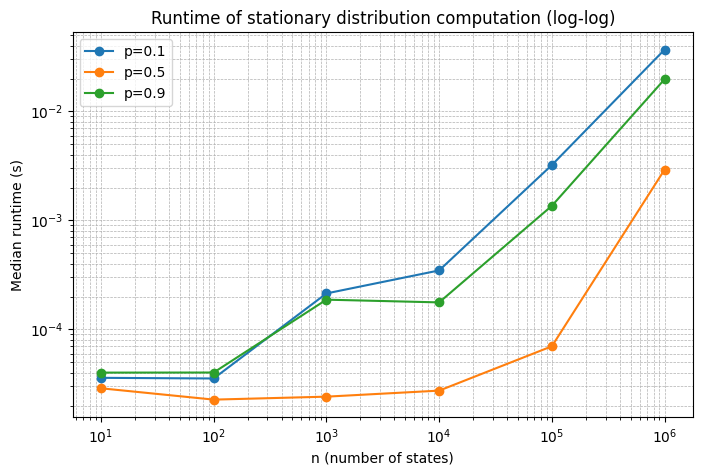

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from math import log, exp, isclose
import pandas as pd
import os

def stationary_reversible_tridiagonal(p: float, n: int) -> np.ndarray:
    """
    Return the stationary distribution pi for the n-state chain.
    p = probability p <= 1
    n = size of the transition matrix
    
    The formula used:
        pi_i = r^{i-1} * (r-1) / (r^n - 1),  i=1..n  with r = p/q
    Edge cases handled:
      - p == 1  -> absorbing at state n (pi = e_n)
      - p == 0  -> absorbing at state 1 (pi = e_1)
      - r == 1  -> limit r->1 gives uniform distribution (p == q == 1/2)
      - n == 1  -> single-state chain pi = [1]
    """
    
    if not (0.0 <= p <= 1.0):
        raise ValueError("p must be in [0,1]")
    if not (isinstance(n, int) and n >= 1):
        raise ValueError("n must be a positive integer")
    
    q = 1.0 - p
    # trivial 1-state chain
    if n == 1:
        return np.array([1.0], dtype=float)
    # edge absorbing cases
    if np.isclose(p, 1.0):
        pi = np.zeros(n, dtype=float)
        pi[-1] = 1.0
        return pi
    if np.isclose(p, 0.0):
        pi = np.zeros(n, dtype=float)
        pi[0] = 1.0
        return pi
    
    # general case
    # r = p/q (note q is not zero here because p not 1)
    r = p / q
    if np.isclose(r, 1.0):
        # limit as r -> 1 gives uniform distribution
        return np.ones(n, dtype=float) / n
    
    # compute vector safely
    # use powers r**(i) for i=0..n-1 which correspond to r^{i-1} when i=1..n
    exponents = np.arange(n, dtype=float)  # 0..n-1
    # compute numerator and denominator; then normalize to guard against tiny rounding errors
    numer = np.power(r, exponents) * (r - 1.0)
    denom = np.power(r, n) - 1.0
    pi = numer / denom
    # numerical safety: renormalize
    pi = pi / np.sum(pi)
    return pi



def build_transition_matrix(p: float, n: int) -> np.ndarray:
    """Construct the n x n transition matrix P."""
    q = 1.0 - p
    P = np.zeros((n, n), dtype=float)
    if n == 1:
        P[0,0] = 1.0
        return P
    # first row
    P[0,0] = q
    P[0,1] = p
    # interior rows
    for i in range(1, n-1):
        P[i, i-1] = q
        P[i, i+1] = p
    # last row
    P[n-1, n-2] = q
    P[n-1, n-1] = p
    return P

def verify_stationary(pi: np.ndarray, P: np.ndarray, tol: float = 1e-12) -> float:
    """
    Return the infinity-norm of the difference pi*P - pi.
    If this is near zero, pi is (numerically) stationary.
    """
    diff = pi.dot(P) - pi
    return np.max(np.abs(diff))

# Timing runner
def time_runs(p_list, n_list, repeats=3):
    results = []
    for p in p_list:
        for n in n_list:
            times = []
            for _ in range(repeats):
                t0 = time.perf_counter()
                _ = stationary_reversible_tridiagonal(p, n)
                t1 = time.perf_counter()
                times.append(t1 - t0)
            median_time = float(np.median(times))
            results.append({'p': p, 'n': n, 'time_s': median_time})
            # print progress light
            print(f"p={p:.3f}, n={n:,}, median_time={median_time:.6f}s")
    df = pd.DataFrame(results)
    return df


# Choose n = 10^k for k=1..6 (10 -> 1,000,000). Adjust if too slow.
n_list = [10**k for k in range(1,7)]
p_list = [0.1, 0.5, 0.9]  # examples with r<1, r=1, r>1
df = time_runs(p_list, n_list, repeats=3)

# Plot runtime on log-log scale (one chart)
plt.figure(figsize=(8,5))
for p in p_list:
    dsub = df[df['p']==p].sort_values('n')
    plt.loglog(dsub['n'], dsub['time_s'], marker='o', label=f"p={p}")
plt.xlabel("n (number of states)")
plt.ylabel("Median runtime (s)")
plt.title("Runtime of stationary distribution computation (log-log)")
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()